<a href="https://colab.research.google.com/github/NiallSheridan22/MachineLearning/blob/main/EnsembleLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The goal of this study is to identify the most significant factors for recognizing credit card fraud trends using Feature Selection, and then to assess the effectiveness of several Machine Learning models (using these variables) functioning both independently and together using Ensemble Learning.


Ensemble learning the process by which multiple models, such as classifiers or experts, are strategically generated and combined to solve a particular computational intelligence problem.

In [36]:
#Import Libraries that are needed.
# Base Libraries
import matplotlib.pyplot as plt  
import pandas as pd
import numpy as np
from numpy import set_printoptions
from numpy import mean
# Models
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
# Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_confusion_matrix



In [ ]:
creditCard = pd.read_csv('./creditcard.csv', sep=',')

creditCard.head(10)


In [ ]:

# Check for duplicates
duplicates = creditCard.duplicated()

# Print the number of duplicates
print("Number of duplicates:", duplicates.sum())

# Print the rows that are duplicates
print("Duplicate rows:")
print(creditCard[duplicates])

There was 100 duplicates now there is zero after using the drop duplicates.

In [39]:
creditCard = creditCard.drop_duplicates() ##removing any duplicates


I know from the logitic Regression model that the dataset contains times and 28 different refernces regarding customers card consumptions. Next I will split the data into train & test sets. 

In [40]:
creditCard.isnull().sum() ##checking to see if theres missing values in the dataset

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [41]:
creditCard = creditCard.dropna() ##CreditCard 
##DataFrame has missing values, I can remove the rows containing missing values 
##using dropna method of Pandas DataFrame. 


In [42]:
creditCard.isnull().sum() ##currently no missing values now

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [43]:
array = creditCard.values

X = array[:,0:30] #X = array[:,0:30] takes the first 30 columns of the  
                  #NumPy array array and assigns them to a variable X as the features of the model.
Y = array[:,30] #Y takes the 31st column

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, stratify=Y)

Feature Selection (Importance)
Tree-based estimators (see the sklearn.tree module and forest of trees in the sklearn.ensemble module) can be used to compute impurity-based feature importances, which in turn can be used to discard irrelevant features (when coupled with the SelectFromModel meta-transformer):




In [44]:
# feature extraction
clf = ExtraTreesClassifier(n_estimators=10)
clf.fit(X, Y)
print(clf.feature_importances_)

[0.01738927 0.01092317 0.00352562 0.1085358  0.06617955 0.01212021
 0.0208608  0.01721679 0.00335981 0.05012822 0.04948057 0.18539675
 0.05964783 0.0094774  0.14066865 0.00791803 0.01915906 0.07607493
 0.01014273 0.01238712 0.01243316 0.02222426 0.0103598  0.00344562
 0.01066857 0.00670582 0.0315184  0.00680111 0.0054447  0.00980625]


Models - Random Forest, K-Nearest-Neighbor, and Logistic Regression. These models will be tested using sklearn library.  X and y receive new values, based on the most representative variables found by Feature Selection.

In [45]:
array = creditCard.values
X = array[:, [17,14,10,12,11]]
Y = array[:,30]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, stratify=Y)

Creating the knn model and testing it. GridSearch is used to test all values for n_neighbors, and finally we fit the model to the training data.

In [47]:
knn = KNeighborsClassifier(algorithm='auto')
params_knn = {
    'n_neighbors': (1,30, 1),
    'leaf_size': (20,40,1),
    'p': (1,2),
    'weights': ('uniform', 'distance'),
    'metric': ('minkowski', 'chebyshev')}
knn_gs = GridSearchCV(
    estimator=knn,
    param_grid=params_knn,
    scoring = 'accuracy',
    n_jobs = -1,
    cv = 5)

%time knn_gs.fit(X_train, y_train)
y_pred = knn_gs.predict(X_test)

CPU times: user 553 ms, sys: 68.3 ms, total: 622 ms
Wall time: 20.5 s


the best model is saved and the best parameters are shown, together with model's Area Under the Curve (AUC)

In [48]:
knn_best = knn_gs.best_estimator_
print(knn_gs.best_params_)
fpr, tpr, _ = roc_curve(y_test, y_pred)

knn_auc = auc(fpr, tpr)

{'leaf_size': 20, 'metric': 'minkowski', 'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}


Random Forest. I will be creating a Random forest classifier, as I want to test the values. I will be using gridsearch to test the values. 

In [14]:
rf = RandomForestClassifier()
params_rf = {"n_estimators": np.arange(1,30,1)}
rf_gs = GridSearchCV(rf, params_rf, cv=5)

%time rf_gs.fit(X_train, y_train)
y_pred = rf_gs.predict(X_test)

CPU times: user 7.31 s, sys: 38.6 ms, total: 7.35 s
Wall time: 7.37 s


In [15]:
rf_best = rf_gs.best_estimator_
print(rf_gs.best_params_)

fpr, tpr, _ = roc_curve(y_test, y_pred)

rf_auc = auc(fpr, tpr) 

{'n_estimators': 7}


Logistic Regression

In [23]:
log_reg = LogisticRegression(max_iter=1000)
%time log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

CPU times: user 35.4 ms, sys: 59.7 ms, total: 95.1 ms
Wall time: 95.9 ms


In [24]:
fpr, tpr, _ = roc_curve(y_test, y_pred)

lr_auc = auc(fpr, tpr)

Ensemble - The whole purpose of this project to combine the supervised algorithms. Voting/stacking classifiers.

In [26]:
estimators=[("knn", knn_best), ("rf", rf_best), ("log_reg", log_reg)]

Now Voting Classifier. Trains on an ensemble of numerous models and predicts an output (class) based on their highest probability of chosen class as the output.


In [27]:
ensemble_class = VotingClassifier(estimators, voting="hard")

ensemble_class.fit(X_train, y_train)

ensemble_class.score(X_test, y_test)
y_pred = ensemble_class.predict(X_test)

best model is saved and the best parameters are shown, together with model's Area Under the Curve.

In [28]:
fpr, tpr, _ = roc_curve(y_test, y_pred)

ensemble_class_auc = auc(fpr, tpr) 

Stacking Classifier - combines multiple classification models to create one “super” model

In [49]:
ensemble_stack = StackingClassifier(estimators=estimators)

ensemble_stack.fit(X_train, y_train)

ensemble_stack.score(X_test, y_test)
y_pred = ensemble_stack.predict(X_test)

In [50]:
fpr, tpr, _ = roc_curve(y_test, y_pred)

ensemble_stack_auc = auc(fpr, tpr)

Model Metrics to see the results shown

In [51]:
print("KNN Score: {}".format(knn_best.score(X_test, y_test)))
print("RF Score: {}".format(rf_best.score(X_test, y_test)))
print("Log_Reg Score: {}".format(log_reg.score(X_test, y_test)))
print("Ensemble Voting Score: {}".format(ensemble_class.score(X_test, y_test)))
print("Ensemble Stacking Score: {}".format(ensemble_stack.score(X_test, y_test)))

KNN Score: 0.9986013986013986
RF Score: 0.9994405594405594
Log_Reg Score: 0.9994405594405594
Ensemble Voting Score: 0.9994405594405594
Ensemble Stacking Score: 0.9994405594405594


 using AUC, it is possible to see that the objective was achieved: to find a percentage of precision using only the variables chosen by the Feature Selection (which possibly also decreased overfitting). 

In [52]:
print("KNN AUC: {}".format(knn_auc))
print("RF AUC: {}".format(rf_auc))
print("Log_Reg AUC: {}".format(lr_auc))
print("Ensemble Voting AUC: {}".format(ensemble_class_auc))
print("Ensemble Stacking AUC: {}".format(ensemble_stack_auc))

KNN AUC: 0.9681880443944929
RF AUC: 0.875
Log_Reg AUC: 0.875
Ensemble Voting AUC: 0.875
Ensemble Stacking AUC: 0.9375


Now I will plot the results.

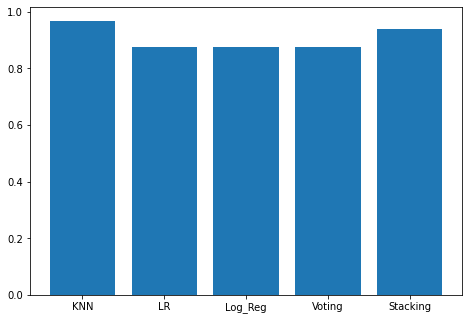

In [53]:

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
models = ['KNN', 'LR', 'Log_Reg', 'Voting', 'Stacking']
values = [knn_auc, rf_auc, lr_auc, ensemble_class_auc, ensemble_stack_auc]
ax.bar(models, values)
plt.show()

Confussion Metrics

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


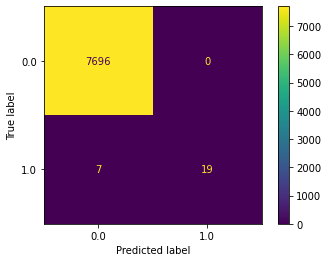

In [ ]:
plot_confusion_matrix(knn_gs, X_test, y_test)  
plt.show() 